<a href="https://colab.research.google.com/github/leroon19/Visualization-of-data-from-listings-on-Airbnb/blob/main/Visualization_of_the_dataset_Airbnb_accommodation_listings_in_Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 2 | EDA

**Общие моменты:**

* Обязательно гуглите всю необходимую информацию. Вы можете использовать прочие (которые не упоминались на занятиях) методы и алгоритмы для решения задач, но при условии, что Вы сможете их объяснить. Если Вы нашли какой-то интересный способ решения, то нужно в комментарий добавить ссылку на источник.

* Списывать/плагиатить строго запрещено. Можно использовать готовые решения из интернета только в случае, если Вы укажите ссылку на источник. И поясните, почему лучше так, а не каким-то стандартным (рекомендуемым) способом.

* Желательно (но не обязательно) указывать комментарии в Вашем решении. Это и Вам поможет понять, что Вы делаете. И также это поможет преверяющему в случае вопросов.

* Технологии типа ChatGPT не использовать.

* В случае каких-то вопросов или спорных ситуаций (например, после получения результатов дз), обращайтесь к ассистенту/преподавателю. И лучше пишите какие-то комментарии к своему коду, чтобы спорных ситуаций было как можно меньше.

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов (+ бонус). Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

* Сдавать ДЗ в SmartLMS!

**Успехов!**

## Данные:

Вам предлагается использовать в качестве датасета списки размещения Airbnb в любом понравившимся вам городе.

Информация о наборе данных и загрузка: http://insideairbnb.com/get-the-data.html

Датасет содержит следующие атрибуты:

* id: Уникальный идентификатор объявления.
* name: Название объявления.
* host_id: Уникальный идентификатор хозяина.
* host_name: Имя хозяина.
* neighbourhood_group: Группа районов.
* neighbourhood: Название района.
* latitude: Широта местоположения жилья.
* longitude: Долгота местоположения жилья.
* room_type: Тип комнаты (например, "Отдельная комната" или "Жилье целиком").
* price: Цена за ночь в евро. 
* minimum_nights: Минимальное количество ночей, которое необходимо забронировать.
* number_of_reviews: Общее количество отзывов.
* last_review: Дата последнего отзыва.
* reviews_per_month: Среднее количество отзывов в месяц.
* calculated_host_listings_count: Общее количество объявлений хозяина.
* availability_365: Количество доступных дней для бронирования в течение следующих 365 дней.
* number_of_reviews_ltm: Количество отзывов за последние 12 месяцев. Показывает активность объекта размещения за последний год.
* licence: Номер лицензии объекта размещения. Указывает на наличие лицензии у хозяина для предоставления услуг сдачи жилья. Может содержать пропущенные значения, если лицензия не предоставлена или не требуется.

## Задание 1 (0.25 балла): Загрузка и чтение данных

* Загрузите набор данных с сайта Inside Airbnb: http://insideairbnb.com/get-the-data.html. Выберите файл "listings.csv" для города, который Вам приглянулся. Для удобства проверки укажите в комментарии выбранный город.

* Прочитайте данные и выведите первые 5 строк DataFrame, чтобы убедиться, что данные загружены и считаны правильно.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date as dt

In [ ]:
#открываем файлик с помощью функции read_csv и копирования пути файла, выводим первые 5 строк
lst = pd.read_csv('/content/gdrive/MyDrive/Дата сосайенс/listings-2.csv')
lst.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,322,2023-02-28,1.90,1,44,37,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.14,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,143,3,248,2023-02-26,1.82,1,14,20,0363 974D 4986 7411 88D8
3,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,76,2,476,2023-02-28,3.12,2,79,97,0363 607B EA74 0BD8 2F6F
4,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,56,2,618,2023-03-03,4.23,2,69,85,0363 607B EA74 0BD8 2F6F


In [ ]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6998 non-null   int64  
 1   name                            6998 non-null   object 
 2   host_id                         6998 non-null   int64  
 3   host_name                       6998 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6998 non-null   object 
 6   latitude                        6998 non-null   float64
 7   longitude                       6998 non-null   float64
 8   room_type                       6998 non-null   object 
 9   price                           6998 non-null   int64  
 10  minimum_nights                  6998 non-null   int64  
 11  number_of_reviews               6998 non-null   int64  
 12  last_review                     63

**Критерии оценки:**

* Успешная загрузка набора данных и его чтение в виде DataFrame.
* Предоставление вывода с первыми 5 строками, чтобы показать, что данные считаны правильно.

## Задание 2 (1.25 балла): Предобработка данных

* Исследуйте пропущенные значения в наборе данных. Определите столбцы с большим количеством пропущенных значений.

* Удалите дубликаты строк и обработайте все пропуски.

* Преобразуйте типы данных при необходимости. Например, если столбец 'last_review' имеет тип данных object, преобразуйте его в формат datetime.

* Выведите информацию о DataFrame для проверки успешного выполнения всех операций предварительной обработки.

In [ ]:
lst.isna().sum()
# больше всего пропущенных значений явно в neighbourhood_group  — абсолютно все (будем дропать). 
# также одинаково много их в last_review и reviews_per_month, чекнем, сколько процентов от общего, стоит ли дропать колонку

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6998
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        682
reviews_per_month                  682
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             24
dtype: int64

In [ ]:
lst.drop('neighbourhood_group', axis=1, inplace = True) #дропаем полностью пустую колонку
lst

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,69,3,322,2023-02-28,1.90,1,44,37,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.364070,4.893930,Private room,106,1,339,2020-04-09,2.14,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.387610,4.891880,Private room,143,3,248,2023-02-26,1.82,1,14,20,0363 974D 4986 7411 88D8
3,28871,Comfortable double room,124245,Edwin,Centrum-West,52.367750,4.890920,Private room,76,2,476,2023-02-28,3.12,2,79,97,0363 607B EA74 0BD8 2F6F
4,29051,Comfortable single room,124245,Edwin,Centrum-Oost,52.365840,4.891110,Private room,56,2,618,2023-03-03,4.23,2,69,85,0363 607B EA74 0BD8 2F6F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,842462220391708128,Flat in the center of Amsterdam,47205615,Edgar,Centrum-Oost,52.359386,4.893717,Entire home/apt,450,1,0,NaN,NaN,1,70,0,0363 80A2 E913 8FAD A98A
6994,842493348876281257,3bed ark close to city centre,454835217,Barbara,Oud-Noord,52.401950,4.902256,Entire home/apt,360,2,0,NaN,NaN,1,357,0,0363 B755 6BD8 6F8D AA7F
6995,842634905680862660,ground floor studio 46m2 at boulevard & canal,504448710,Ivanka,Oud-Noord,52.393502,4.899826,Entire home/apt,92,3,0,NaN,NaN,1,67,0,0363 76A0 B46B 281A C38E
6996,842713539293550316,Oasis in trendy Amsterdam East,17537276,Thomas,Watergraafsmeer,52.351350,4.920430,Entire home/apt,250,1,0,NaN,NaN,1,315,0,0363 97C2 71FF 5383 DC95


In [ ]:
lst['last_review'].value_counts(normalize = True, dropna=False)
# 0,097 = 9,7% от всех значений, т.е. меньше 40% пропусков

NaN           0.097456
2023-03-05    0.031009
2023-01-02    0.021292
2023-02-19    0.018577
2023-01-01    0.018148
                ...   
2019-03-26    0.000143
2018-01-21    0.000143
2022-02-24    0.000143
2020-11-14    0.000143
2022-07-19    0.000143
Name: last_review, Length: 941, dtype: float64

In [ ]:
lst['reviews_per_month'].value_counts(normalize = True, dropna=False) 
# точно так же с reviews_per_month

NaN     0.097456
0.29    0.014004
0.15    0.011861
0.28    0.011575
0.37    0.011575
          ...   
7.16    0.000143
4.98    0.000143
3.30    0.000143
6.52    0.000143
4.88    0.000143
Name: reviews_per_month, Length: 613, dtype: float64

In [ ]:
lst[(lst['reviews_per_month'].isna()) & (lst['last_review'].isna())].shape 
# видно было визуально, а сейчас проверено на чиселках, что пропуски в колонках совпадают по строкам, поэтому 
# итого имеем 10% пропусков от всего кол-ва строк, в этих двух колонках. так что я бы просто дропнула строки с пропусками, тк данных у нас много.
# и те 24 пропуска из license тоже можно дропнуть

(682, 17)

In [ ]:
lst.dropna(subset = ['reviews_per_month', 'last_review', 'license'], inplace = True)
# дропнула все строки с пропусками

In [ ]:
lst.isna().sum()
# проверила кол-во пропуусков теперь

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [ ]:
lst.drop_duplicates(inplace = True)
# дропнула дубликаты, но вроде бы их и не было

In [ ]:
# перепроставила индексы, чтоб они начинались с нуля и шли по порядку
lst.reindex(range((lst['id'].shape[0])),method='ffill')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,69,3,322,2023-02-28,1.90,1,44,37,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.364070,4.893930,Private room,106,1,339,2020-04-09,2.14,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.387610,4.891880,Private room,143,3,248,2023-02-26,1.82,1,14,20,0363 974D 4986 7411 88D8
3,28871,Comfortable double room,124245,Edwin,Centrum-West,52.367750,4.890920,Private room,76,2,476,2023-02-28,3.12,2,79,97,0363 607B EA74 0BD8 2F6F
4,29051,Comfortable single room,124245,Edwin,Centrum-Oost,52.365840,4.891110,Private room,56,2,618,2023-03-03,4.23,2,69,85,0363 607B EA74 0BD8 2F6F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,713667623231781051,At Amstel - with parking and use of bikes (roo...,16898219,Margaux,De Pijp - Rivierenbuurt,52.333790,4.902880,Private room,146,2,12,2022-12-11,2.24,2,57,12,0363 71C9 B5A3 FA77 AAA6
6291,734574167989660403,Spacious Suite at Park and Museum,5144636,Anthony,Zuid,52.360459,4.874221,Private room,119,2,10,2023-03-03,7.50,1,64,10,0363 FB16 D04B EF6F D6E5
6292,734574167989660403,Spacious Suite at Park and Museum,5144636,Anthony,Zuid,52.360459,4.874221,Private room,119,2,10,2023-03-03,7.50,1,64,10,0363 FB16 D04B EF6F D6E5
6293,733803741061691698,Mooi appartement met balkon in Amsterdam Oost,10620995,Sake,Oostelijk Havengebied - Indische Buurt,52.363355,4.931658,Entire home/apt,200,3,2,2023-03-05,0.90,1,18,2,0363 70F6 15D3 57EA 1C02


In [ ]:
lst['last_review'] = pd.to_datetime(lst['last_review'])
lst.last_review.dtype
# проверяем, что формат стал датой

dtype('<M8[ns]')

In [ ]:
lst.info()
# нет пропусков и дубликатов, все типы данных соответствуют действительности

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 0 to 6956
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              6295 non-null   int64         
 1   name                            6295 non-null   object        
 2   host_id                         6295 non-null   int64         
 3   host_name                       6295 non-null   object        
 4   neighbourhood                   6295 non-null   object        
 5   latitude                        6295 non-null   float64       
 6   longitude                       6295 non-null   float64       
 7   room_type                       6295 non-null   object        
 8   price                           6295 non-null   int64         
 9   minimum_nights                  6295 non-null   int64         
 10  number_of_reviews               6295 non-null   int64         
 11  last

**Критерии оценки:**

* Проведение анализа пропущенных значений и принятие решения о их обработке.
* Удаление дубликатов и корректное изменение типов данных при необходимости.
* Предоставление вывода о структуре и типах данных DataFrame после предварительной обработки.

## Задание 3 (1.25 балла): Исследование выбросов

* Визуализируйте распределения числовых столбцов, таких как 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count' и 'availability_365', используя графики ящика с усами (boxplots) или гистограммы.

* Используя визуализации, определите наличие выбросов в числовых столбцах и примите решение о том, как их обработать

* После обработки выбросов визуализируйте распределения числовых столбцов снова, чтобы убедиться, что выбросы были успешно обработаны.

[Text(0.5, 0, 'Доступность 365'), Text(0, 0.5, 'Частота')]

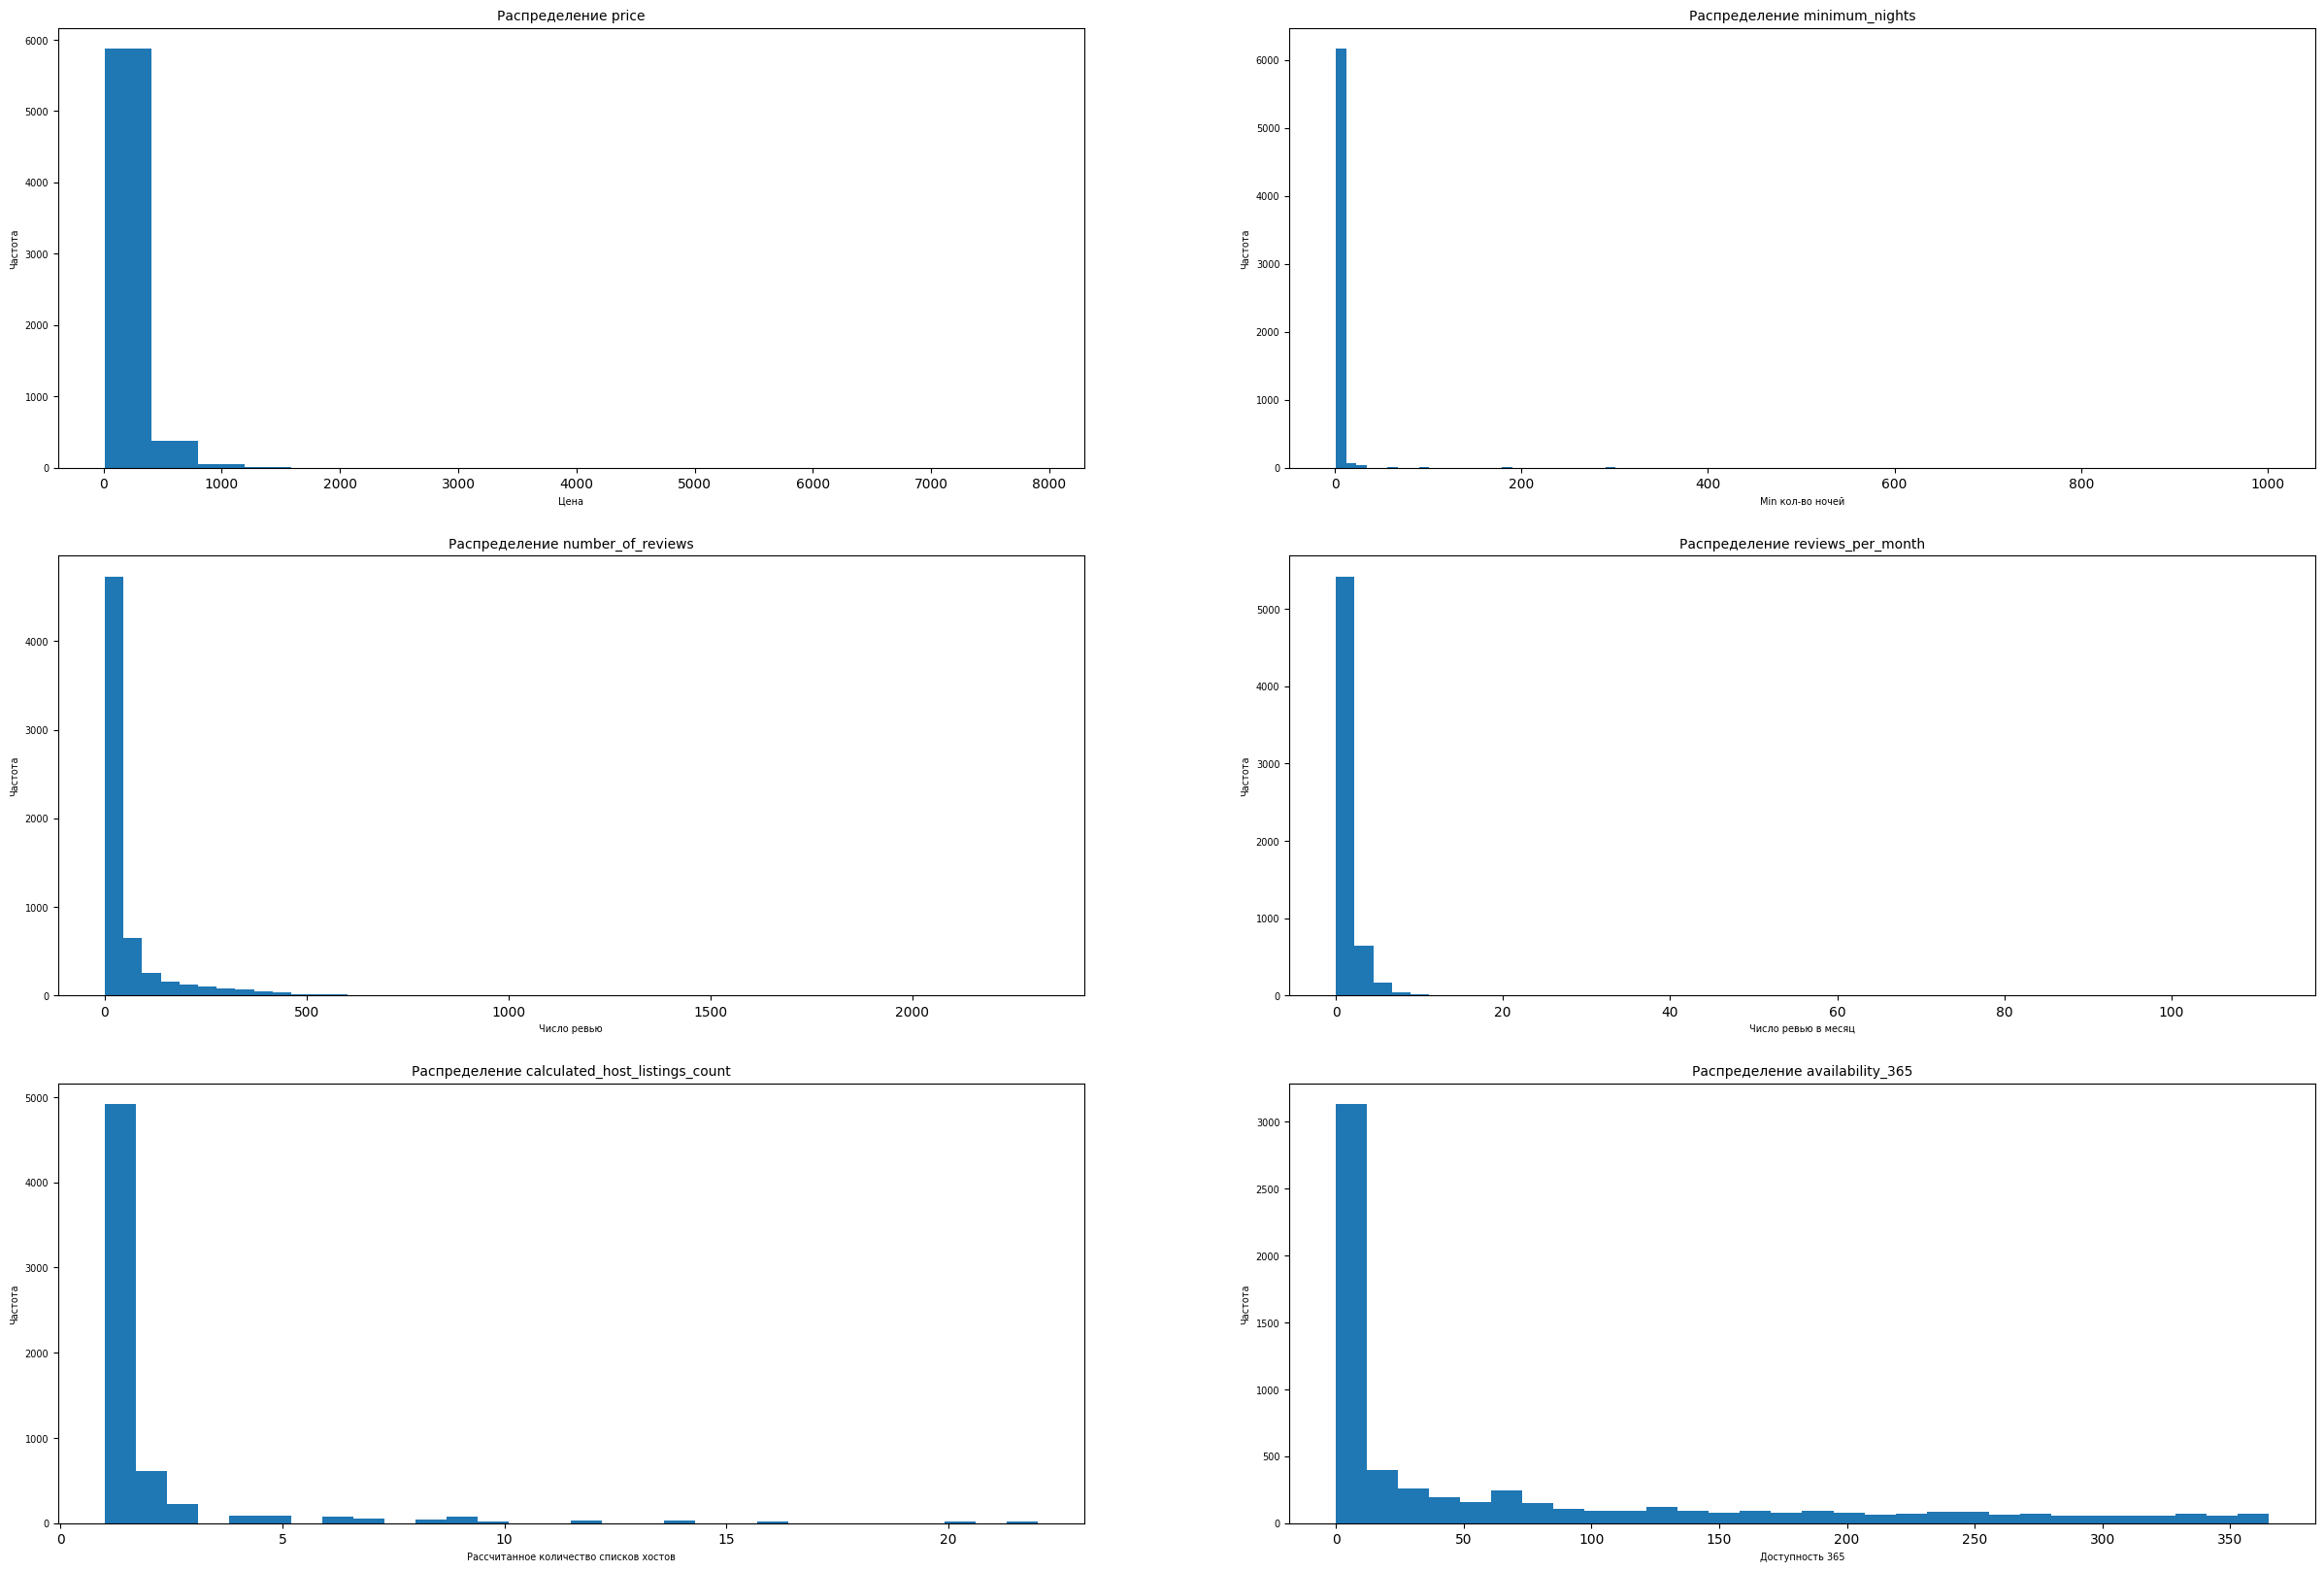

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (30,20))
ax[0][0].hist(lst['price'], 20)
ax[0][0].set_title('Распределение price') 
ax[0][0].set(xlabel='Цена', ylabel='Частота')                                     

ax[0][1].hist(lst['minimum_nights'], 90)
ax[0][1].set_title('Распределение minimum_nights') 
ax[0][1].set(xlabel='Min кол-во ночей', ylabel='Частота') 

ax[1][0].hist(lst['number_of_reviews'], 50)
ax[1][0].set_title('Распределение number_of_reviews') 
ax[1][0].set(xlabel='Число ревью', ylabel='Частота') 

ax[1][1].hist(lst['reviews_per_month'], 50)
ax[1][1].set_title('Распределение reviews_per_month')
ax[1][1].set(xlabel='Число ревью в месяц', ylabel='Частота')  

ax[2][0].hist(lst['calculated_host_listings_count'], 30)
ax[2][0].set_title('Распределение calculated_host_listings_count') 
ax[2][0].set(xlabel='Рассчитанное количество списков хостов', ylabel='Частота') 

ax[2][1].hist(lst['availability_365'], 30)
ax[2][1].set_title('Распределение availability_365') 
ax[2][1].set(xlabel='Доступность 365', ylabel='Частота') 
# видно, что везде есть столбец-интервал значений, в котором сконцентрирована основная часть данных. сложно настроить масштаб, чтобы было
# видно все выбросы, поэтому построю еще ящики с усами

[Text(0, 1, '')]

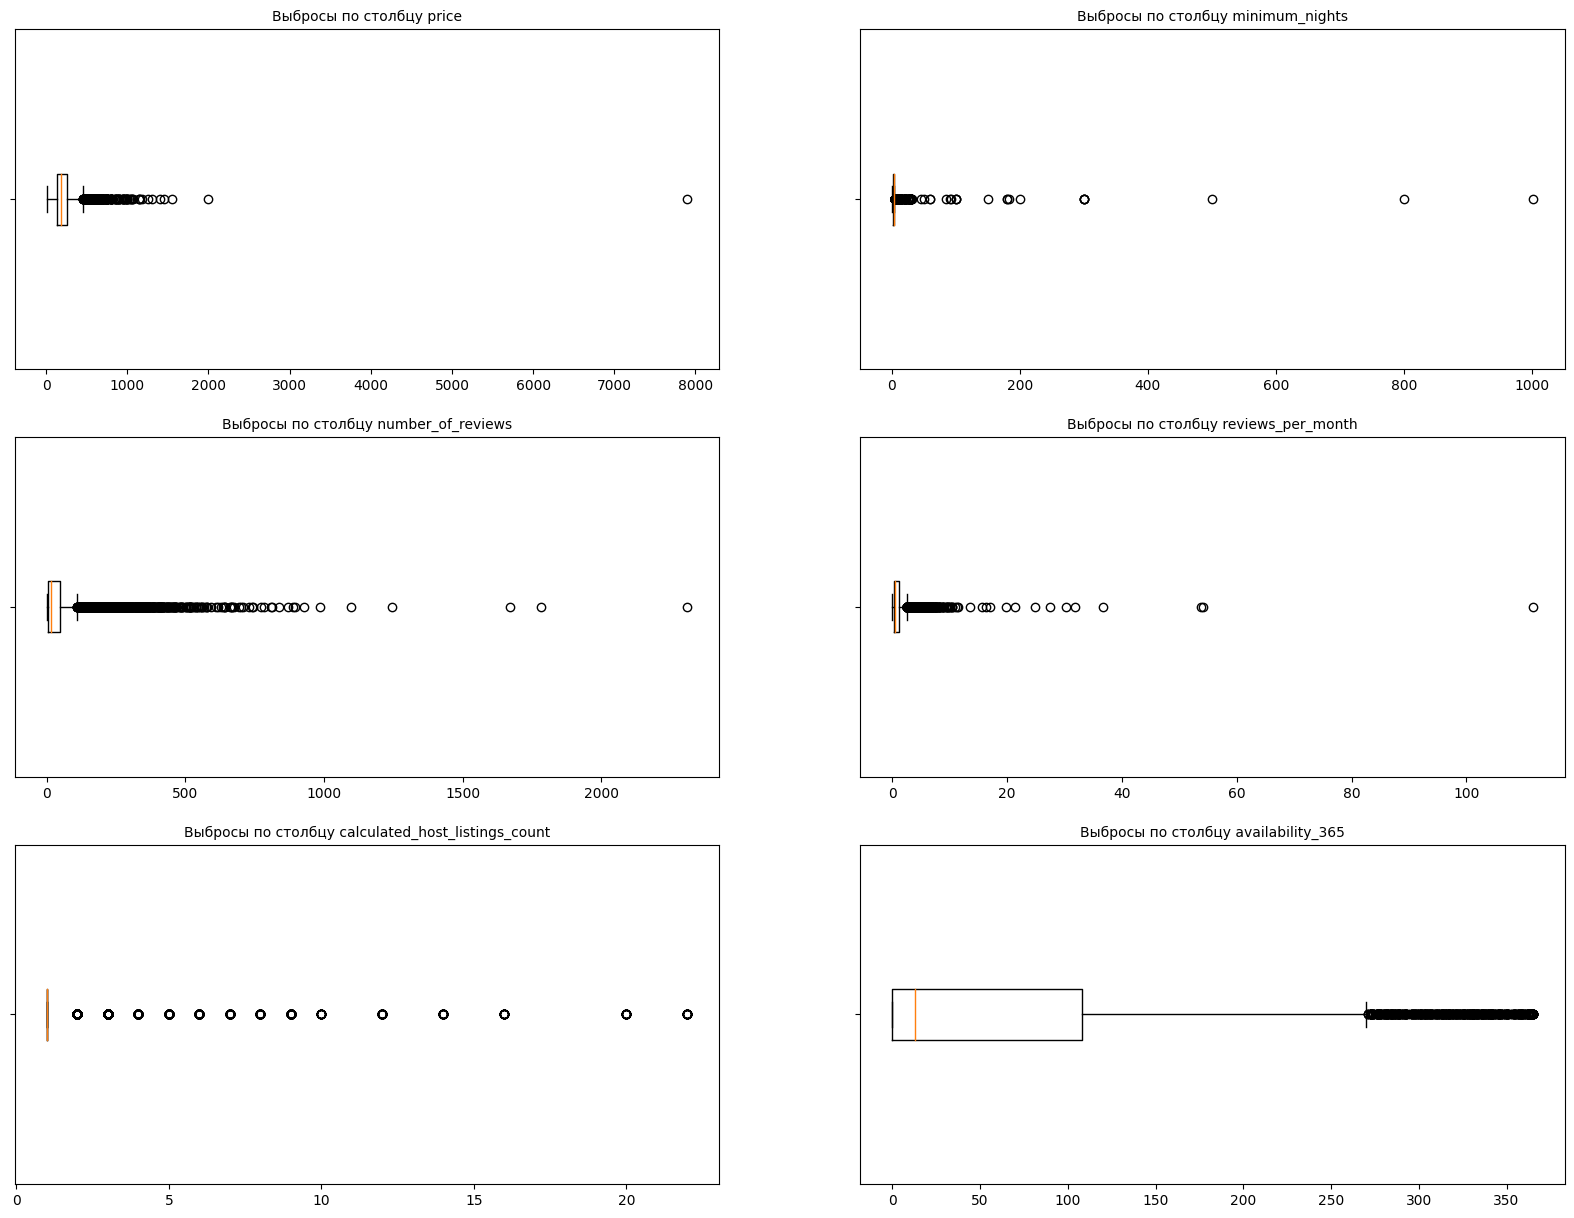

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (20,15))
ax[0][0].boxplot(lst['price'], vert = False)
ax[0][0].set_title('Выбросы по столбцу price') 
ax[0][0].set_yticklabels([])

ax[0][1].boxplot(lst['minimum_nights'], vert = False)
ax[0][1].set_title('Выбросы по столбцу minimum_nights') 
ax[0][1].set_yticklabels([])

ax[1][0].boxplot(lst['number_of_reviews'], vert = False)
ax[1][0].set_title('Выбросы по столбцу number_of_reviews') 
ax[1][0].set_yticklabels([])

ax[1][1].boxplot(lst['reviews_per_month'], vert = False)
ax[1][1].set_title('Выбросы по столбцу reviews_per_month') 
ax[1][1].set_yticklabels([])

ax[2][0].boxplot(lst['calculated_host_listings_count'], vert = False)
ax[2][0].set_title('Выбросы по столбцу calculated_host_listings_count') 
ax[2][0].set_yticklabels([])

ax[2][1].boxplot(lst['availability_365'], vert = False)
ax[2][1].set_title('Выбросы по столбцу availability_365') 
ax[2][1].set_yticklabels([])
# видно достаточно большое кол-во выбросов внутри каждого признака

In [ ]:
# использую везде для выявления выбросов и избавления от них метод 1,5IQR и фильтрацию значений, которые меньше или равны (положим, что
# границы не считаются выбросами)) Q3+1,5IQR
q1pr = lst['price'].quantile(0.25)
q3pr = lst['price'].quantile(0.75)
iqr_pr = q3pr-q1pr
uppr = q3pr + iqr_pr*1.5
lst[lst['price']>uppr].shape[0]
# из 6295 строк 300 оказались выбросами, при удалении выбросов данных все еще останется много, так что можно удалять

300

Text(0.5, 0, 'Price')

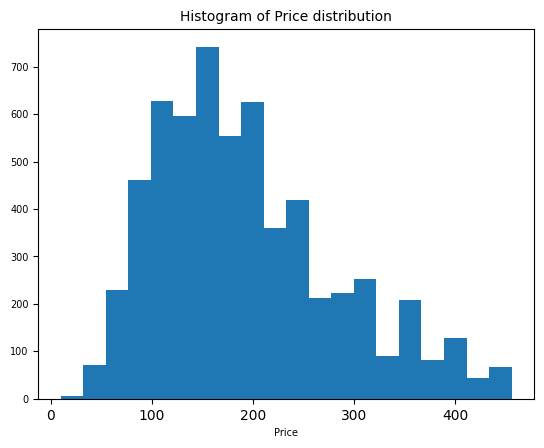

In [ ]:
lst[lst['price']<=uppr]['price'].hist(bins=20, grid=False)
plt.title('Histogram of Price distribution')
plt.xlabel('Price')
# графики ниже, после избавления от выбросов, следует сравнивать в 6 графиками выше. невооруженным глазом видно, что "хвост" из маленьких столбиков
# стал заметно меньше на кадом  из графиков

In [ ]:
q1mn = lst['minimum_nights'].quantile(0.25)
q3mn = lst['minimum_nights'].quantile(0.75)
iqr_mn = q3mn-q1mn
upmn = q3mn + iqr_mn*1.5
lst[lst['minimum_nights']>upmn].shape[0]
# из 6295 строк 943 оказались выбросами, при удалении выбросов данных все еще останется много, так что можно удалять

943

Text(0.5, 0, 'minimum nights')

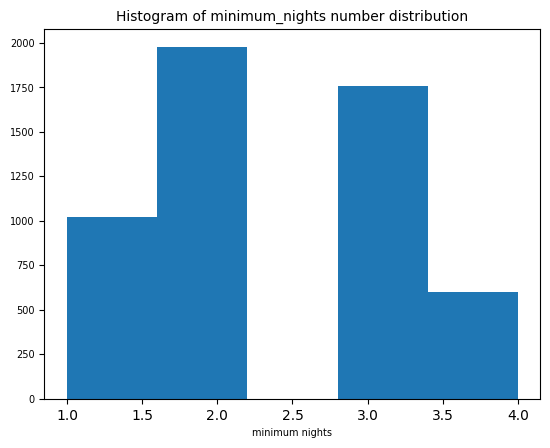

In [ ]:
lst[lst['minimum_nights']<=upmn]['minimum_nights'].hist(bins=5, grid=False)
plt.title('Histogram of minimum_nights number distribution')
plt.xlabel('minimum nights')

In [ ]:
q1nr = lst['number_of_reviews'].quantile(0.25)
q3nr = lst['number_of_reviews'].quantile(0.75)
iqr_nr = q3nr-q1nr
upnr = q3nr + iqr_nr*1.5
lst[lst['number_of_reviews']>upnr].shape[0]
# из 6295 строк 804 оказались выбросами, при удалении выбросов данных все еще останется много, так что можно удалять

804

Text(0.5, 0, 'number of reviews')

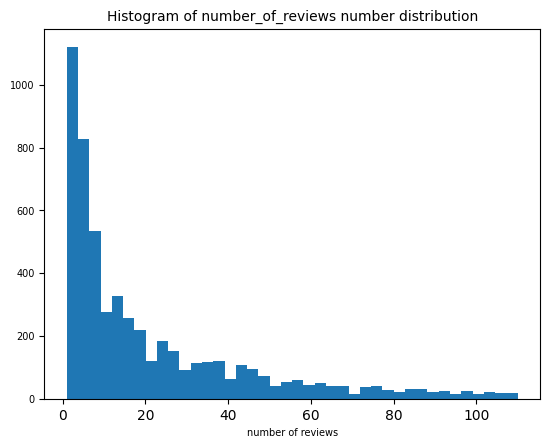

In [ ]:
lst[lst['number_of_reviews']<=upnr]['number_of_reviews'].hist(bins=40, grid=False)
plt.title('Histogram of number_of_reviews number distribution')
plt.xlabel('number of reviews')

In [ ]:
q1rpm = lst['reviews_per_month'].quantile(0.25)
q3rpm = lst['reviews_per_month'].quantile(0.75)
iqr_rpm = q3rpm-q1rpm
uprpm = q3rpm + iqr_rpm*1.5
lst[lst['reviews_per_month']>uprpm].shape[0]
# из 6295 строк 777 оказались выбросами, при удалении выбросов данных все еще останется много, так что можно удалять

777

Text(0.5, 0, 'review per month')

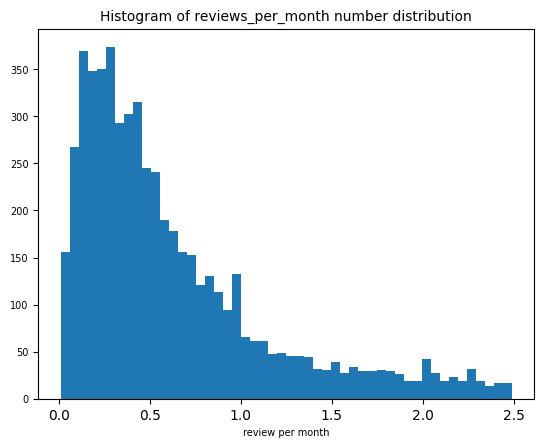

In [ ]:
lst[lst['reviews_per_month']<=uprpm]['reviews_per_month'].hist(bins=50, grid=False)
plt.title('Histogram of reviews_per_month number distribution')
plt.xlabel('review per month')

In [ ]:
# из 6295 строк 1378 оказались выбросами, при удалении данных все еще останется много, так что можно выкидывать
q1chlc = lst['calculated_host_listings_count'].quantile(0.25)
q3chlc = lst['calculated_host_listings_count'].quantile(0.75)
iqr_chlc = q3chlc-q1chlc
upchlc = q3chlc + iqr_chlc*1.5
lst[lst['calculated_host_listings_count']>upchlc].shape[0]

1378

Text(0.5, 0, 'calculated host listings count')

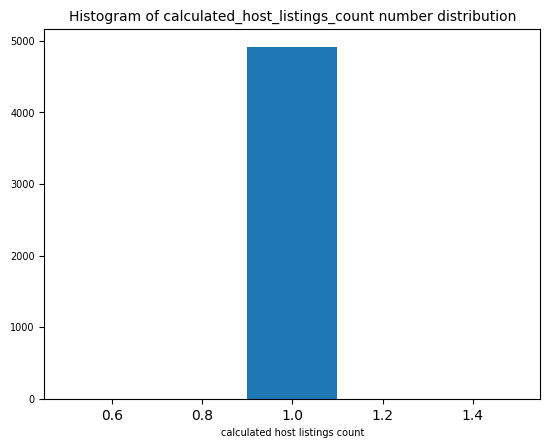

In [ ]:
lst[lst['calculated_host_listings_count'] <= upchlc]['calculated_host_listings_count'].hist(bins=5,  grid=False)
plt.title('Histogram of calculated_host_listings_count number distribution')
plt.xlabel('calculated host listings count')

In [ ]:
q1av = lst['availability_365'].quantile(0.25)
q3av = lst['availability_365'].quantile(0.75)
iqr_av = q3av-q1av
upav = q3av + iqr_av*1.5
lst[lst['availability_365']>upav].shape[0]
# из 6295 строк 468 оказались выбросами, при удалении выбросов данных все еще останется много, так что можно удалять

468

Text(0.5, 0, 'availability 365')

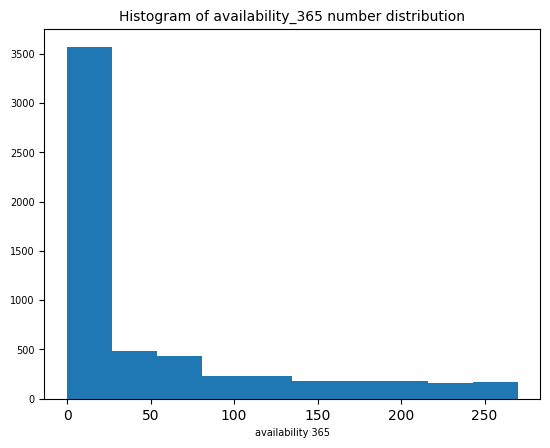

In [ ]:
lst[lst['availability_365'] <= upav]['availability_365'].hist(bins=10, grid=False)
plt.title('Histogram of availability_365 number distribution')
plt.xlabel('availability 365')

**Критерии оценки:**

* Визуализация распределений числовых столбцов для выявления выбросов.
* Принятие обоснованного решения о том, как обработать выбросы и успешное выполнение соответствующих операций.
* Предоставление графиков до и после обработки выбросов для демонстрации успешной обработки.

## Задание 4 (1.75 балл): Создание новых признаков

* Создайте признак 'distance_to_city_center_km', который вычисляет расстояние от каждого объекта размещения до центра города. В качестве координат центра используйте значения с сайта: https://batchgeo.com/map/latitude-longitude

* Создайте новый признак "days_since_last_review" на основе столбца 'last_review'. Это может быть полезно для определения свежести отзывов и активности размещения.

* Создайте новый признак "booking_rate" на основе столбцов 'availability_365' и 'number_of_reviews'. Это может быть полезно для определения популярности размещения.

* Проведите анализ созданных признаков: исследуйте распределения

* Выведите информацию о DataFrame и первые 5 строк, чтобы убедиться, что новые признаки были успешно созданы.

In [ ]:
# 52°22′N 4°54′E центр Амстера — latitude 52.22 	longitude	4.54
# предполагаю, что найти расстояние в км можно по теореме Пифагора 
# источник предположения: https://ru.onlinemschool.com/math/library/analytic_geometry/point_point_length/#:~:text=AB%20%3D%20√AC2%20%2B%20BC,точками%20в%20пространстве%20выводится%20аналогично.
lst['distance_to_city_center_km'] = (((lst['latitude'] - 52.22) *  67.137)**2 + ((lst['longitude'] - 4.54) * 111.134861111)**2)**0.5

In [ ]:
lst["days_since_last_review"] = pd.to_datetime(dt.today()) - lst['last_review']

In [ ]:
def booking_rating(x):
  if x['availability_365'] < lst['availability_365'].mean() and x['number_of_reviews'] > lst['number_of_reviews'].mean():
    return 'Размещение популярное'
  elif x['availability_365'] > lst['availability_365'].mean() and x['number_of_reviews'] < lst['number_of_reviews'].mean():
    return 'Размещение непопулярное'
  elif x['availability_365'] <= lst['availability_365'].mean() and x['number_of_reviews'] <= lst['number_of_reviews'].mean():
    return 'Сложно определить рейтинг'
  elif x['availability_365'] >= lst['availability_365'].mean() and x['number_of_reviews'] >= lst['number_of_reviews'].mean():
    return 'Сложно определить рейтинг'

In [ ]:
lst['booking_rate'] = lst.apply(booking_rating, axis=1)

<Axes: ylabel='Frequency'>

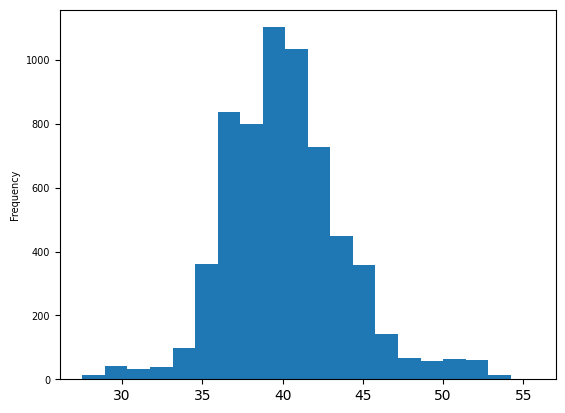

In [ ]:
lst['distance_to_city_center_km'].plot(kind='hist', bins=20)

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = go.Figure()

d = []

d.append(go.Scattermapbox(lat=lst['latitude'], lon =lst['longitude']))
    

fig = go.Figure(d)

updatemenu= [dict()]

buttons=[]
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)

fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=go.layout.mapbox.Center(lat=52.42, lon=4.84), zoom=9))
fig.show()

На карте можем увидеть, что квартиры покрывают все районы Амстердама, но явно не отклоняются от центра на 40 км. 

Центр по данным с сайта не очень точно совпадает с фактическим центром города по карте - видим, что точки на карте сконцентрированы на больших широте и долготе. Отсюда получаем в солбце с новым признаком расстояние до центра больше, чем действительное (аж до сорока километров, что невероятные расстояния в масштабах Амстердама). 

<Axes: ylabel='Frequency'>

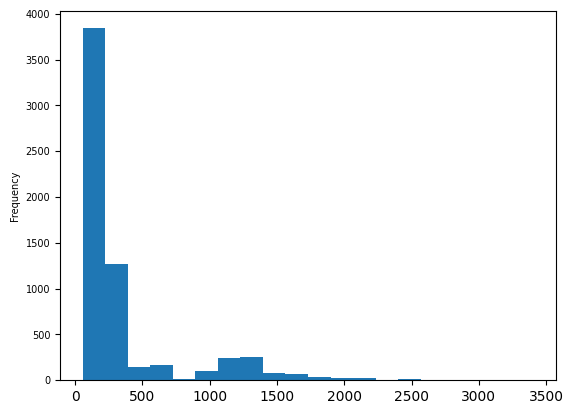

In [ ]:
lst['days_since_last_review'].dt.days.plot(kind='hist', bins=20)

<Axes: >

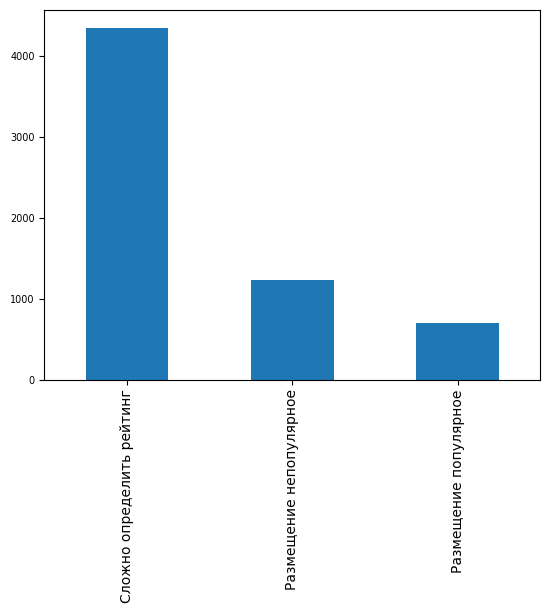

In [ ]:
lst['booking_rate'].value_counts().plot(kind='bar')

In [ ]:
lst.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,distance_to_city_center_km,days_since_last_review,booking_rate
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,322,2023-02-28,1.90,1,44,37,0363 5F3A 5684 6750 D14D,45.886866,64 days,Размещение популярное
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.14,2,0,0,0363 CBB3 2C10 0C2A 1E29,40.505757,1119 days,Размещение популярное
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.38761,4.89188,Private room,143,3,248,2023-02-26,1.82,1,14,20,0363 974D 4986 7411 88D8,40.692948,66 days,Размещение популярное
3,28871,Comfortable double room,124245,Edwin,Centrum-West,52.36775,4.89092,Private room,76,2,476,2023-02-28,3.12,2,79,97,0363 607B EA74 0BD8 2F6F,40.241186,64 days,Сложно определить рейтинг
4,29051,Comfortable single room,124245,Edwin,Centrum-Oost,52.36584,4.89111,Private room,56,2,618,2023-03-03,4.23,2,69,85,0363 607B EA74 0BD8 2F6F,40.230249,61 days,Размещение популярное


In [ ]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 0 to 6956
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   id                              6295 non-null   int64          
 1   name                            6295 non-null   object         
 2   host_id                         6295 non-null   int64          
 3   host_name                       6295 non-null   object         
 4   neighbourhood                   6295 non-null   object         
 5   latitude                        6295 non-null   float64        
 6   longitude                       6295 non-null   float64        
 7   room_type                       6295 non-null   object         
 8   price                           6295 non-null   int64          
 9   minimum_nights                  6295 non-null   int64          
 10  number_of_reviews               6295 non-null   int64       

**Критерии оценки:**

* Создание новых признаков на основе существующих данных.
* Анализ распределения новых признаков.
* Предоставление вывода о структуре и типах данных DataFrame после создания новых признаков.

## Задание 5 (1.5 балла): Время статистики!

* Рассчитайте описательные статистики для категориальных переменных. Опишите, какие выводы вы можете сделать из полученных данных.

* Рассчитайте описательные статистики для числовых переменных. Опишите, какие выводы вы можете сделать из полученных данных для хотя бы трех признаков.

* Выберите 3 интересующих вас числовых признака и рассчитайте релевантные описательные статистики для этих признаков, сгруппировав данные по категориальным переменным, таким как 'room_type', 'neighbourhood_group' или 'property_type'. Какие закономерности вы можете отметить? Как их можно проинтерпретировать?

In [ ]:
# для категориальных больше всего подходит мода. считаем:
lst['name'].mode() #наиболее часто встречающиеся названия объявлений. бимодальное распределение. что удивило — второе название

0                          Apartment in Amsterdam
1    Residences | 2-Bedrooms | Serviced Apartment
Name: name, dtype: object

In [ ]:
lst[lst['name'] == 'Apartment in Amsterdam'].shape[0] #проверила, сколько раз встречается каждое название, может, оба встречаются не очень много раз,
# и этим объясняется то, что у нас такая странная вторая мода

8

In [ ]:
lst[lst['name'] == 'Residences | 2-Bedrooms | Serviced Apartment'].shape[0] # оказалось достаточно много. предполагаю, 
# что это просто 8 объявлений одного хоста

8

In [ ]:
lst['host_name'].mode()  #наиболее часто встречающиеся имена хостов

0    Maarten
Name: host_name, dtype: object

In [ ]:
lst['neighbourhood'].mode() #наиболее часто встречающиеся названия районов

0    De Baarsjes - Oud-West
Name: neighbourhood, dtype: object

In [ ]:
lst['room_type'].mode() #наиболее часто встречающиеся типы комнат (из двух)

0    Entire home/apt
Name: room_type, dtype: object

In [ ]:
lst['license'].mode() # #наиболее часто встречающиеся значения для лицензий

0    Exempt
Name: license, dtype: object

**Цена**

In [ ]:
round(lst[lst['price']<=uppr]['price'].mean(),2)

193.33

In [ ]:
lst[lst['price']<=uppr]['price'].mode()

0    150
Name: price, dtype: int64

In [ ]:
lst[lst['price']<=uppr]['price'].median()

175.0

In [ ]:
print(lst[lst['price']<=uppr]['price'].min(), lst[lst['price']<=uppr]['price'].max())

10 456


У признака price унимодальное скошенное вправо распределение данных. Если смотреть в рамках всего размаха распределения данных, значения моды, медианы и среднего близки друг к другу. Поэтому можно считать, для общего понимания, что у нас есть знание, что цена лежит в основном в диапазоне от 150 до 193. 

**Широта и долгота**

In [ ]:
round(lst['latitude'].mean(),2)

52.37

In [ ]:
lst['latitude'].mode()

0    52.3881
Name: latitude, dtype: float64

In [ ]:
lst['latitude'].median()

52.36625

In [ ]:
round(lst['longitude'].mean(),2)

4.89

In [ ]:
lst['longitude'].mode()

0    4.91438
Name: longitude, dtype: float64

In [ ]:
lst['longitude'].median()

4.88826

Центр Амстера — latitude 52.22 	longitude	4.54. Соответственно, по нашим данным больше объявлений о сдаче недвижимости находятся к северо-востоку от центра. 

**Минимум ночей для бронирования** 

In [ ]:
lst[lst['minimum_nights']<=upmn]['minimum_nights'].mean()

2.36136023916293

In [ ]:
lst[lst['minimum_nights']<=upmn]['minimum_nights'].mode()

0    2
Name: minimum_nights, dtype: int64

In [ ]:
lst[lst['minimum_nights']<=upmn]['minimum_nights'].median()

2.0

 Чаще всего и в среднем минимальное число заброненных ночей должно быть не меньше двух.

**Число отзывов**

In [ ]:
lst[lst['number_of_reviews']<=upnr]['number_of_reviews'].mean()

21.505008195228555

In [ ]:
lst[lst['number_of_reviews']<=upnr]['number_of_reviews'].mode()

0    1
Name: number_of_reviews, dtype: int64

In [ ]:
lst[lst['number_of_reviews']<=upnr]['number_of_reviews'].median()

11.0

Данные очень неравномерно распределены. Даже после удаления выбросов остались объявления, на которых около 100 отзывов и множество тех, где отзыв всего 1. Поэтому среднее сильно смещено вправо относительно моды. По данным МЦТ практически ничего нельзя сказать о данных, не видя исходной выборки и ее визуализации.

**Число отзывов в мес**

In [ ]:
lst[lst['reviews_per_month']<=uprpm]['reviews_per_month'].mean()

0.6246085538238493

In [ ]:
lst[lst['reviews_per_month']<=uprpm]['reviews_per_month'].mode()

0    0.29
Name: reviews_per_month, dtype: float64

In [ ]:
lst[lst['reviews_per_month']<=uprpm]['reviews_per_month'].median()

0.45

В месяц оставляют в среднем от 0,29 до 0,62 отзывов. 

Наибольшее количество данных действительно сосредоточено в диапазоне от 0,29 отзывов в месяц до 0,45 отзывов в месяц. Среднее смещено в большую сторону даже несмотря на удаление выбросов. 

**Общее количество объявлений одного хозяина**

In [ ]:
lst[lst['calculated_host_listings_count']<=upchlc]['calculated_host_listings_count'].mean()

1.0

In [ ]:
lst[lst['calculated_host_listings_count']<=upchlc]['calculated_host_listings_count'].mode()

0    1
Name: calculated_host_listings_count, dtype: int64

In [ ]:
lst[lst['calculated_host_listings_count']<=upchlc]['calculated_host_listings_count'].median()

1.0

Судя по описательным статистикам, общее количество объявлений одного хозяина = 1, если убрать выбросы. Чаще всего люди сдают одну квартиру, но есть, конечно, и люди, которые сдают массово, они были посчитаны как выбросы. 

**Возможность брони на следующий год**

In [ ]:
lst[lst['availability_365']<=upav]['availability_365'].mean()

49.176591728162

In [ ]:
lst[lst['availability_365']<=upav]['availability_365'].mode()

0    0
Name: availability_365, dtype: int64

In [ ]:
lst[lst['availability_365']<=upav]['availability_365'].median()

8.0

Чаще всего встречаются объявления, апарты по которым уже недоступны для брони на следующий год. Но есть и довольно много апартов, где в среднем 48 доступных дней для брони есть. 

Для понимания общей ситуации помогает медиана — чаще всего все-таки апарты уже недоступны для брони, но реже встречаются и те, где бронь еще возможна

**Кол-во отзывов за последний год** 

In [ ]:
q1ltm = lst['number_of_reviews_ltm'].quantile(0.25)
q3ltm = lst['number_of_reviews_ltm'].quantile(0.75)
iqr_ltm = q3ltm-q1ltm
upltm = q3ltm + iqr_ltm*1.5
lst[lst['number_of_reviews_ltm']>upltm].shape[0]

# избавляемся тут от выбросов, чтобы посчитать МЦТ

940

In [ ]:
lst[lst['number_of_reviews_ltm']<=upltm]['number_of_reviews_ltm'].mean()

4.819607843137255

In [ ]:
lst[lst['number_of_reviews_ltm']<=upltm]['number_of_reviews_ltm'].mode()

0    0
Name: number_of_reviews_ltm, dtype: int64

In [ ]:
lst[lst['number_of_reviews_ltm']<=upltm]['number_of_reviews_ltm'].median()

3.0

Очень большое кол-во объявлений не получало отзывов за последний год вообще (о чем говорит мода). В среднем отзывов на объявление за последний год было где-то от 3 до 5. 

**<h3>Выберите 3 интересующих вас числовых признака и рассчитайте релевантные описательные статистики для этих признаков, сгруппировав данные по категориальным переменным, таким как 'room_type', 'neighbourhood_group' или 'property_type'. Какие закономерности вы можете отметить? Как их можно проинтерпретировать?<h3>**

Я выбрала цену, min число ночей и количество отзывов. Так как данные в целом очищены от выбросов и они числовые, можно использовать среднее арифмметическое

In [ ]:
lst[lst['price']<=uppr].groupby("room_type")["price"].mean() #видно, что наибольшая цена аренды у целых апартаментов, а наименьшая у "коммуналки"

room_type
Entire home/apt    214.472872
Hotel room         165.388889
Private room       140.893800
Shared room         95.861111
Name: price, dtype: float64

In [ ]:
lst[lst['minimum_nights']<=upmn].groupby('room_type')['minimum_nights'].mean() #видно, что миниальное число ночей для аренды
# выше для целых апартаментов, а не отдельных комнат

room_type
Entire home/apt    2.557462
Hotel room         1.357143
Private room       1.966016
Shared room        1.342857
Name: minimum_nights, dtype: float64

In [ ]:
lst.groupby('room_type')['number_of_reviews'].mean()  # меньше всего отзывов об аренде целых апартов, возможно, их просто реже арендуют в целом

room_type
Entire home/apt     25.196401
Hotel room         135.571429
Private room       127.964156
Shared room        125.388889
Name: number_of_reviews, dtype: float64

**Критерии оценки:**

* Расчет описательных статистик для категориальных и числовых переменных и предоставление результатов.
* Описание выводов, которые можно сделать на основе описательных статистик.
* Выбор 3 числовых признаков и группировка данных по категориальным переменным для расчета описательных статистик. Описание закономерностей и их интерпретация.

## Задание 6 (1 балл): Корреляции

* Найдите три самых сильных линейных взаимосвязи.

* Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны.

*важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций*


In [ ]:
 #вывожу матрицу корреляций, которая нужна по критериям
lst.corr()

<ipython-input-188-3a3c9c2745a2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,distance_to_city_center_km
id,1.000000,0.248103,-0.036162,-0.035125,0.118582,-0.020999,-0.230425,-0.000992,-0.037074,0.063956,-0.109968,-0.037875
host_id,0.248103,1.000000,-0.011972,-0.017611,0.007688,-0.040785,-0.073337,0.140507,0.271252,0.222024,0.096433,-0.018457
latitude,-0.036162,-0.011972,1.000000,-0.104334,-0.001373,-0.015972,0.021464,0.014702,0.066884,0.020516,0.011404,-0.034306
longitude,-0.035125,-0.017611,-0.104334,1.000000,-0.011245,0.005597,0.002507,-0.022728,-0.002918,0.002895,-0.006245,0.997451
price,0.118582,0.007688,-0.001373,-0.011245,1.000000,-0.009606,-0.157047,-0.101493,-0.042869,0.132090,-0.096005,-0.012683
minimum_nights,-0.020999,-0.040785,-0.015972,0.005597,-0.009606,1.000000,-0.019099,-0.027162,-0.019781,0.032211,-0.032370,0.004615
number_of_reviews,-0.230425,-0.073337,0.021464,0.002507,-0.157047,-0.019099,1.000000,0.719099,0.036944,0.192168,0.733321,0.003559
reviews_per_month,-0.000992,0.140507,0.014702,-0.022728,-0.101493,-0.027162,0.719099,1.000000,0.115594,0.228874,0.933900,-0.022123
calculated_host_listings_count,-0.037074,0.271252,0.066884,-0.002918,-0.042869,-0.019781,0.036944,0.115594,1.000000,0.350398,0.108368,0.001644
availability_365,0.063956,0.222024,0.020516,0.002895,0.132090,0.032211,0.192168,0.228874,0.350398,1.000000,0.233814,0.004520


In [ ]:
# через цикл нахожу топ три скоррелированных пары
from pandas.api.types import is_numeric_dtype

cols = list(lst)
res = []
for i in range(len(cols)): 
  for j in range(i + 1, len(cols)):
    a = cols[i]
    b = cols[j]
    if not is_numeric_dtype(lst[a]) or not is_numeric_dtype(lst[b]):
      continue
    
    res.append([abs(lst[a].corr(lst[b])), lst[a].corr(lst[b]), a, b])

res = sorted(res, reverse=True)
for i in range(10): 
  print(res[i][1:])

[0.9974512533912913, 'longitude', 'distance_to_city_center_km']
[0.9338999869108722, 'reviews_per_month', 'number_of_reviews_ltm']
[0.7333213743813397, 'number_of_reviews', 'number_of_reviews_ltm']
[0.7190991665424441, 'number_of_reviews', 'reviews_per_month']
[0.350397946405549, 'calculated_host_listings_count', 'availability_365']
[0.2712524015217656, 'host_id', 'calculated_host_listings_count']
[0.24810290363818294, 'id', 'host_id']
[0.2338141301315404, 'availability_365', 'number_of_reviews_ltm']
[-0.23042511001716362, 'id', 'number_of_reviews']
[0.2288739887919518, 'reviews_per_month', 'availability_365']


In [ ]:
lst['longitude'].corr(lst['distance_to_city_center_km'])
# в этих парах показатели не столько коррелируют, сколько напрямую влияют друг на друга, объясняю:
# На расстояние от центра до точки влияют координаты долготы (даже больше, чем широты, так как выше их вес в формулке)

0.9974512533912913

In [ ]:
lst['reviews_per_month'].corr(lst['number_of_reviews_ltm'])
# Есть вероятность, что в более ранние периоды активность ревьюеров была не так высока, а в последний год объекты активно ревьюили, 
# поэтому количество отзывов за последний год сильно "зааффектило" средние значения за месяц

0.9338999869108722

In [ ]:
lst['number_of_reviews'].corr(lst['number_of_reviews_ltm'])
# Показатель общее число отзывов включает в себя число отзывов за последний год, так что логично, что они коррелируют

# Есть вероятность, что в более ранние периоды активность ревьюеров была не так высока, в связи с чем
# большое число отзывов за последний год "аффектит" общее число отзывов

# либо общая активность ревьюеров наоборот примерно равная на протяжении разных временных периодах, в связи с чем
# общее число отзывов растет с той же скоростью, как и число отзывов, оставленных за последний год

0.7333213743813397

**Критерии оценки:**

* Расчет матрицы корреляций для числовых признаков и предоставление результатов.
*Отбор и вывод трех пар самых сильно скоррелированных признаков с использованием кода.
* Содержательная интерпретация найденных взаимосвязей между признаками.

## Задание 7 (2 балла): Визуализации

* Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. 

* К каждой визуализации должна прилагаться содержательная текстовая интерпретация. 

* Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил (названия, подписи осей, легенды и т. д.). Необходимо задействовать не менее 4 типов диаграмм.

Text(0.5, 1.0, 'Корреляция между изменением долготы и расстояния до центра')

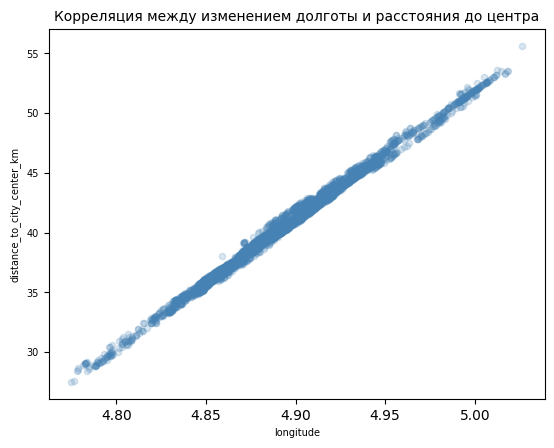

In [ ]:
# но все выводы, которые я уже сделала, я сделала по графикам...
# okay, let's try
lst.plot("longitude", "distance_to_city_center_km", kind = "scatter", alpha = 0.2, color = 'steelblue')
plt.title('Корреляция между изменением долготы и расстояния до центра')
# график подтверждает прямую тесную взаимосвязь между изменением координат долготы и расстояния до центра

<Axes: xlabel='room_type'>

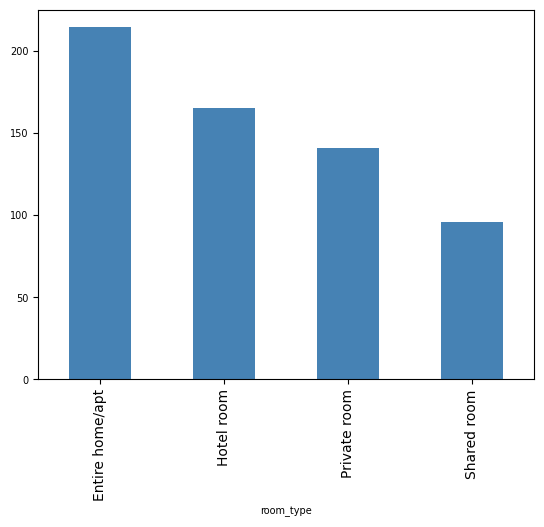

In [ ]:
df = lst[lst['price']<=uppr].groupby("room_type")["price"].mean()
df.plot(kind = 'bar', color = 'steelblue')
# на графике можно увидеть, что наиболее высокие цены в среднем на жилье типа "целый дом/апарты", а наименьшие цены — на "коммуналки"

In [ ]:
meanrt = lst[lst['price']<=uppr].groupby("room_type")["price"].mean()
medianrt = lst[lst['price']<=uppr].groupby("room_type")["price"].median()
modert = lst[lst['price']<=uppr].groupby("room_type")["price"].agg(pd.Series.mode)

In [ ]:
dfmct = pd.DataFrame({'name': ['Entire home/apt', 'Hotel room', 'Private room','Shared room'],
    'mean price': [meanrt[0], meanrt[1], meanrt[2], meanrt[3]],
    'median price': [medianrt[0], medianrt[1], medianrt[2], medianrt[3]],
    'mode price': [modert[0], modert[1], modert[2], modert[3][0]]})
dfmct

,name,mean price,median price,mode price
0,Entire home/apt,214.472872,200.0,150
1,Hotel room,165.388889,164.0,125
2,Private room,140.893800,125.0,100
3,Shared room,95.861111,50.5,44


<Axes: xlabel='name'>

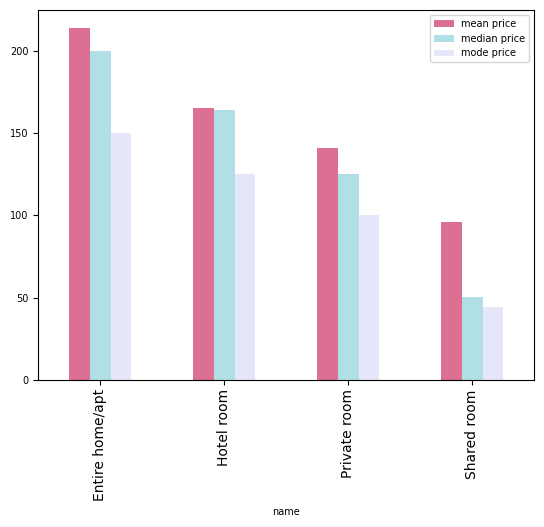

In [ ]:
dfmct[['name', 'mean price', 'median price', 'mode price']].plot(x='name', kind='bar', color=['palevioletred', 'powderblue', 'lavender'] )
# можно увидеть относительно большое отклонение среднего от моды и медианы в shared room, значит, убрав выбросы в целом по признаку price в df,
# мы вероятнее всего не убрали этим самым выбросы по каждой отдельной категории, тк внутри категории будут свои расчеты и свои "стандарты" не аномальных
# значений. в категории shared room есть размещения, на которые цена почему-то стоит больше, чем на основной массе квартир. за счет них и смещается среднее.
# можно проверить, связаны ли высокие цены на какие-то из коммуналок с близостью к центру города, например. проверю в следующем задании

In [ ]:
lst.groupby(['room_type'])['number_of_reviews'].sum()

room_type
Entire home/apt    114820
Hotel room           7592
Private room       210629
Shared room          4514
Name: number_of_reviews, dtype: int64

<Axes: title={'center': 'Shares of reviews by room type'}, ylabel='number_of_reviews'>

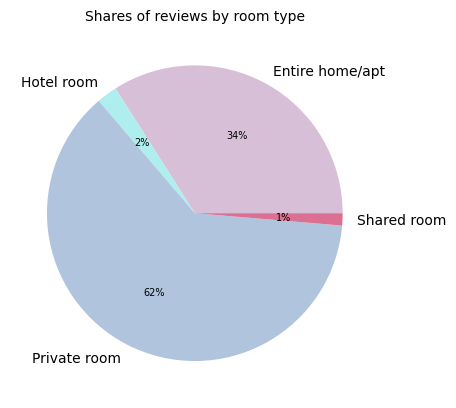

In [ ]:
plt.rc('font', size= 7)
plt.rc('axes', titlesize=10)
plt.rc('xtick', labelsize=10) 
plt.axis('off')
lst.groupby(['room_type'])['number_of_reviews'].sum().plot(kind='pie', y = 'number_of_reviews', autopct='%1.0f%%',
 colors = ['thistle', 'paleturquoise','lightsteelblue', 'palevioletred'],
 title='Shares of reviews by room type')
# наибольшая доля отзывов на агрегаторе приходится на private rooms

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

cols = lst.neighbourhood.unique()
print(cols)

['Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost' 'Centrum-West'
 'De Pijp - Rivierenbuurt' 'Zuid' 'Oud-Oost' 'Westerpark'
 'De Baarsjes - Oud-West' 'Slotervaart' 'IJburg - Zeeburgereiland'
 'Watergraafsmeer' 'Noord-Oost' 'Bos en Lommer' 'Oud-Noord'
 'Buitenveldert - Zuidas' 'Noord-West' 'De Aker - Nieuw Sloten' 'Osdorp'
 'Bijlmer-Centrum' 'Geuzenveld - Slotermeer' 'Gaasperdam - Driemond'
 'Bijlmer-Oost']


In [ ]:
def plot():
  cols = lst['neighbourhood'].unique()

  fig = go.Figure()

  for hood in cols: 
    # Генириуем сами графики (по одному на район)
    lst_try = lst.loc[lst['neighbourhood'] == hood].groupby(['room_type'], as_index=False)['id'].count() # Выделяем нужный район, группируем по типам квартир
    # В поле id записываем количество кваритр в этом районе с таким типом (можно добавить вместо id новую колонку, но зачем))
    # count считает количество уникальных значений в этой колонке и кладет в эту же колонку, генерируя новую маленькую таблицу
    # То есть после этой операции у нас по строке на каждый тип rooь type, и для каждого типа в колонке id записано количество квартир этого типа
    fig.add_trace(go.Pie(values=lst_try['id'], labels=lst_try['room_type'], textinfo='none')) # Добавляем Pie график в общий набор

  buttons =[]

  for i, col in enumerate(cols): # Генерируем кнопки (по одной на каждый район), идем по парам (1, имя_парвого района), (2, имя_второго_района)
    v = [False] * len(cols) 
    v[i] = True # Создаем список, которые отражает, какие графики показывать (iй показываем, остальные выключаем)
    buttons.append(dict(
        method='restyle', 
        label = col, 
        args=["visible", v]
    ))

  # Готовим меню с кнопками
  updatemenu = [dict()]
  updatemenu[0]["buttons"] = buttons
  updatemenu[0]["direction"] = "down"
  updatemenu[0]["showactive"] = True 

  # Добавляем кнопки на график
  fig.update_layout(title_text='Flats by neighborhood', showlegend=True, updatemenus=updatemenu)
  fig.show()

plot()

# Визуализируем количество квартир различных типов в двух районах
# Позволяет сравнить количество квартир данного типа в одном и другом районе, и, например, сделать вывод, где легче найти квартиру определенного типа
# К примеру, в районе De Pijp - Rivierenbuurt 591 Entire home/apt и 128 Private room, а в Osdorp цифры уже 21 и 16 (выбираем эти районы через кнопку)
# Значит в районе De Pijp - Rivierenbuurt сильно легче найти квартиру целиком, а в Osdorp особой разницы нет. Аналогично можно сравнить любые интересующие районы.

<ipython-input-202-f48b57904a66>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

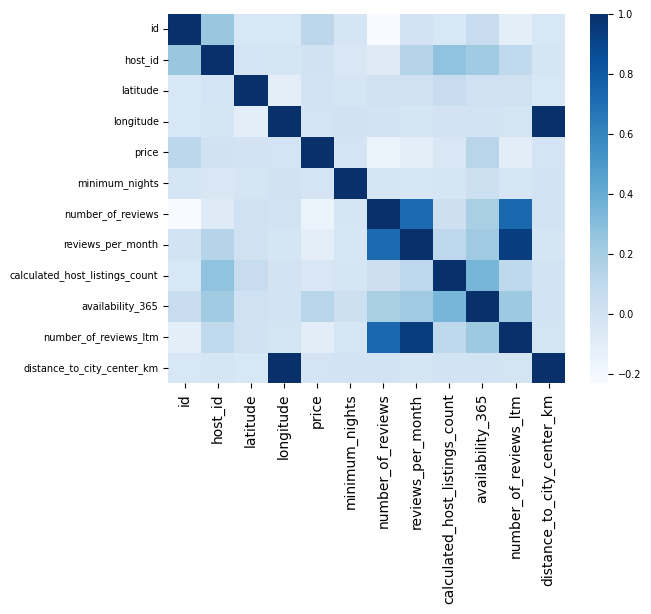

In [ ]:
import seaborn as sns

sns.heatmap(lst.corr(), cmap="Blues")

# визуализация отажает, что действительно наиболее скоррелированные признаки — долгота и дистанция до центра,
# общее кол-во отзывов и кол-во отзывов за посл год, кол-во отзывов в месяц и кол-во отзывов за посл год

**Критерии оценки:**

* Создание 6 содержательных визуализаций с использованием не менее 4 разных типов диаграмм.
* Грамотное оформление визуализаций, с соблюдением всех правил.
* Содержательная текстовая интерпретация для каждой визуализации, объясняющая выводы на основе графика.

## Задание 8 (1 балл): Немного исследований

* Исследуйте данные, используя различные методы анализа и визуализации, чтобы найти какую-нибудь интересную особенность. Это может быть связь между двумя переменными, неожиданный паттерн или что-то еще.

* Проанализируйте и визуализируйте найденную особенность. Используйте различные методы визуализации, если это необходимо.

* Предложите объяснение, почему такая особенность существует. Это может быть ваше предположение или результат анализа.

**Пример:**

Предположим, мы обнаружили интересный факт: районы с высоким средним уровнем цен на жилье имеют более низкий процент доступных объектов на протяжении всего года.

In [ ]:
# казалось бы, логичная гипотеза: ближние к центру квартиры имеют в среднем более высокую стоимость (внутри каждой категории: в разбивке по room type)
lst[lst['room_type'] == 'Shared room']['price'].corr(lst[lst['room_type'] == 'Shared room']['distance_to_city_center_km'])

-0.20724833819102761

In [ ]:
lst[lst['room_type'] == 'Hotel room']['price'].corr(lst[lst['room_type'] == 'Hotel room']['distance_to_city_center_km'])

0.02989890354722886

In [ ]:
lst[lst['room_type'] == 'Private room']['price'].corr(lst[lst['room_type'] == 'Private room']['distance_to_city_center_km'])

-0.02158914776208398

In [ ]:
lst[lst['room_type'] == 'Entire home/apt']['price'].corr(lst[lst['room_type'] == 'Entire home/apt']['distance_to_city_center_km'])

0.00472228894638121

Как должно было быть по логике: чем меньше расстояние до центра, тем выше стоимость квартиры. Однако отрицательная корреляция, и то незначительная, наблюдается только с двух случаях из 4, а в других двух — она вообще положительная, но все еще незначительная. 

Предполагаемые причины:

1) Есть факторы, не указанные в датасете, но влияющие на стоимость квартиры: ее площадь, новизна ремонта и т. д.

2) Возможно, в Амстердаме наиболее крутым и удобным районом для жизни просто не считается центр, поэтому квартиры в центре и не ценятся больше остальных. Может, там на краю города есть какие-то спальные районы, которые считаются лучше для жизни.

3) Наши данные, как мы увидели выше по карте, все как-то смещены от центра, и это может влиять на корреляции. 

In [ ]:
# теперь попробую найти с нормальными координатами центра, а не взятыми с сайта. если верить гуглу, центр Амстердама - площадь Дам
# ее координаты примерно 52.37325 и 4.89252. создам новый признак для простоты:
lst['distance_to_city_center_km_normalize'] = (((lst['latitude'] - 52.37) *  67.137)**2 + ((lst['longitude'] - 4.89) * 111.134861111)**2)**0.5

In [ ]:
# казалось бы, логичная гипотеза: ближние к центру квартиры имеют в среднем более высокую стоимость (внутри каждой категории: в разбивке по room type)
lst[lst['room_type'] == 'Shared room']['price'].corr(lst[lst['room_type'] == 'Shared room']['distance_to_city_center_km_normalize'])

-0.2544535399585796

In [ ]:
lst[lst['room_type'] == 'Hotel room']['price'].corr(lst[lst['room_type'] == 'Hotel room']['distance_to_city_center_km_normalize'])

-0.11947494537965071

In [ ]:
lst[lst['room_type'] == 'Private room']['price'].corr(lst[lst['room_type'] == 'Private room']['distance_to_city_center_km_normalize'])

-0.19927524503723892

In [ ]:
lst[lst['room_type'] == 'Entire home/apt']['price'].corr(lst[lst['room_type'] == 'Entire home/apt']['distance_to_city_center_km_normalize'])

-0.14738852404388192

С "нормализованными" расстояниями до центра результаты стали больше походить на правду — направление везде отрицательное, но корреляции все еще остались слабыми. В силе остаются мои первые два предположения, высказанные выше

Text(0, 0.5, 'Цена')

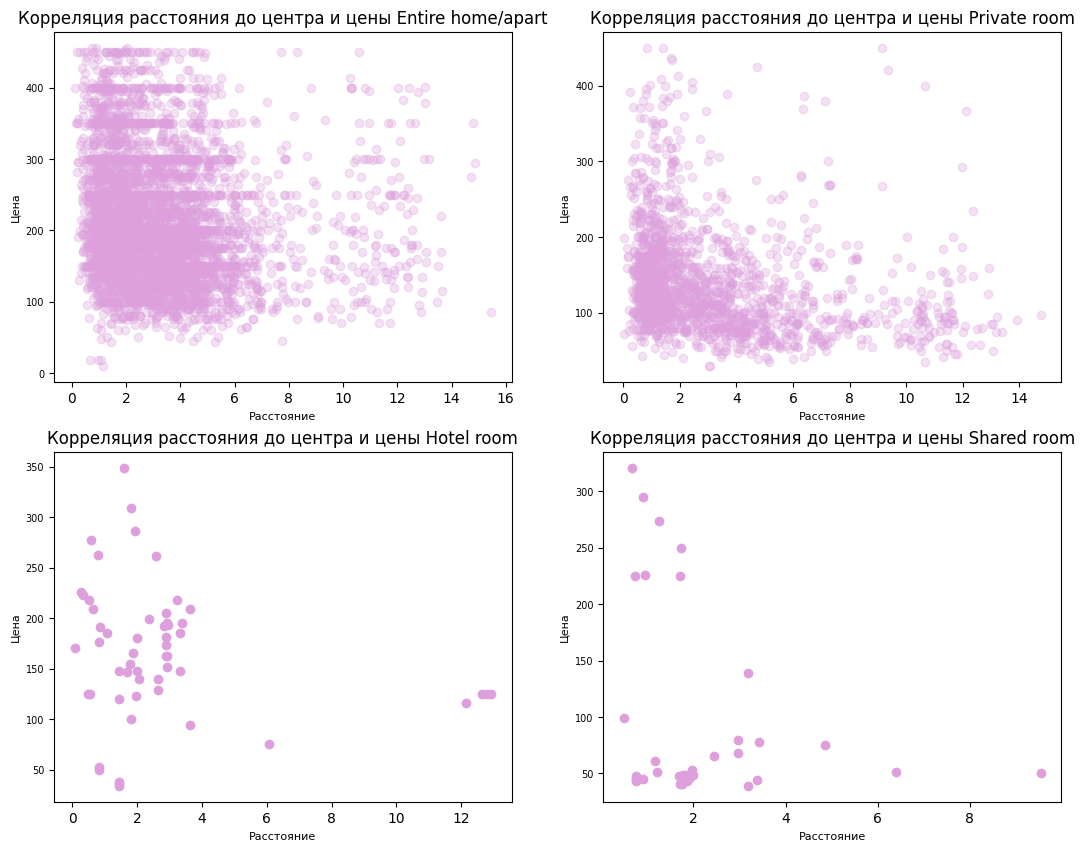

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (13,10))

ax[0][0].scatter(lst[(lst['price']<=uppr) & (lst['room_type'] == 'Entire home/apt')]['distance_to_city_center_km_normalize'], lst[(lst['price']<=uppr) & (lst['room_type'] == 'Entire home/apt')]['price'], color = 'plum', alpha = 0.3)
ax[0][0].set_title('Корреляция расстояния до центра и цены Entire home/apart', fontsize = 12) 
ax[0][0].set_xlabel('Расстояние', fontsize=8)
ax[0][0].set_ylabel('Цена', fontsize=8)

ax[0][1].scatter(lst[(lst['price']<=uppr) & (lst['room_type'] == 'Private room')]['distance_to_city_center_km_normalize'], lst[(lst['price']<=uppr) & (lst['room_type'] == 'Private room')]['price'],color = 'plum', alpha = 0.3)
ax[0][1].set_title('Корреляция расстояния до центра и цены Private room', fontsize = 12)
ax[0][1].set_xlabel('Расстояние', fontsize=8)
ax[0][1].set_ylabel('Цена', fontsize=8)

ax[1][0].scatter(lst[(lst['price']<=uppr) & (lst['room_type'] == 'Hotel room')]['distance_to_city_center_km_normalize'], lst[(lst['price']<=uppr) & (lst['room_type'] == 'Hotel room')]['price'], color = 'plum')
ax[1][0].set_title('Корреляция расстояния до центра и цены Hotel room', fontsize = 12)
ax[1][0].set_xlabel('Расстояние', fontsize=8)
ax[1][0].set_ylabel('Цена', fontsize=8)

ax[1][1].scatter(lst[(lst['price']<=uppr) & (lst['room_type'] == 'Shared room')]['distance_to_city_center_km_normalize'], lst[(lst['price']<=uppr) & (lst['room_type'] == 'Shared room')]['price'], color = 'plum')
ax[1][1].set_title('Корреляция расстояния до центра и цены Shared room', fontsize = 12)
ax[1][1].set_xlabel('Расстояние', fontsize=8)
ax[1][1].set_ylabel('Цена', fontsize=8)
# графики действительно свидетельствуют о том, что корреляции между показателями практически нет


Для проверки гипотезы, что некоторые спальные районы дальше от центра ценятся не дешевле центральных, сделаем следующее:

In [ ]:
def plot_map_no_button():
  cols = lst['neighbourhood'].unique()
  fig = go.Figure()

  for hood in cols: 
 # Графики с картами, выделяем точки конкретного района
    lst_try = lst.loc[lst['neighbourhood'] == hood]
    # Создаем граффик типа "точки на карте", lat - широта, lon - долгота, text - поле, которое будет высвечиваться при наведении на точку, name - имя графика
    fig.add_trace(go.Scattermapbox(lat=lst_try['latitude'], lon =lst_try['longitude'], text=lst_try['room_type'], name= hood))

# Дополнительно указываем, что хотим фон в виде open-street-map карты и проставляем центр для карты (откуда изначально будет показывать )
  fig.update_layout(title_text="Предложения по району и типу жилья", mapbox_style="open-street-map", mapbox=dict(center=go.layout.mapbox.Center(lat=52.42, lon=4.84), zoom=9), showlegend=True, updatemenus=updatemenu)
  fig.show()

def plot_hist_no_button():
  cols = lst['neighbourhood'].unique()

  fig = go.Figure()

  for hood in cols: 
    # Выделяем нужный район, группируем по типу комнат, считаем среднюю цену для каждого типа каждого района 
    # (reset_index чтобы нумерация была правильная, 0, 1,...)
    lst_try = lst.loc[lst['neighbourhood'] == hood].groupby(['room_type'], as_index=False).agg({'price': 'mean'}).reset_index()

   # Добавляем график для данного района (гистограмма)
    fig.add_trace(go.Bar(x=lst_try["room_type"], y=lst_try["price"], name= hood))

  fig.update_layout(title_text="Средняя цена по району и типу комнаты", showlegend=True)
  fig.show()

plot_map_no_button()
plot_hist_no_button()
# Визуализируем друг под другом количество жилья различного типа и расположения жилья, разбитое по районам, на карте
# Позволяет сравнить количество квартир данного типа в одном и другом районе, и, например, сделать вывод где дешевле снять квартиру при желаемом удалении от центра
# Исходно показывает результаты для всех районов сразу (при выборе какого-то варианта через кнопку покажет конкретно для этого района)
# Второй по порядку график отражает квартиры одного района на карте.
# Тогда можем, например, сделать вывод, что для отдаленного района Gaasperdam - Driemond цены будут ниже, чем для центрального Centrum-Oost
# Это подтверждается цифрами на первом графике: 165 за Entire home/apt против 290


Какие выводы мы можем увидеть из этих двух графиков: 

1) Общая тенденция, более центральные районы стоят дороже, все-таки видна (посмотрим на районы Centrum-Oost и Centrum-West (два центральных), цена за Entire home/apt значительно выше цен конкурентов.

2) Однако тенденция далеко не всегда четкая: несмотря на то, что те же районы - соседи, цена за Hotel Room отличается больше чем в два раза. Здесь Centrum-West значительно проигрывает Oud-Oost, хотя расположены они на одном удалении от центра (одна из предполагаемых причин, что в одном из районов просто значительно больше отелей, от чего и цена на съем там ниже). 

Действительно, посмотрим на график ниже, там в Centrum-West намного больше отелей, чем где-либо еще. Это наглядный пример того, как второстепенный фактор сильно перевешивает геолокацию района и, таким образом, удаление от центра.

Можно было бы опасаться, что у нас есть данные о не очень большом количестве различных отелей и вывод делать нельзя, но учитываем, что отдельных отелей в целом не очень много на район (смотрим на график количества отелей в районах ниже). При этом эти отели — от разных владельцев, то есть это не влияние какого-то исключения в виде одного большого отеля.



In [ ]:
def plot_no_button_count():
  cols = lst['neighbourhood'].unique()

  fig = go.Figure()

  for hood in cols: 
    # Оставляем только нужный район, группируем по room type, считаем количество предложений с таким районом/типом. Складываем результат в колонку id
    lst_try = lst.loc[lst['neighbourhood'] == hood].groupby(['room_type'], as_index=False).agg({'id': 'count'}).reset_index()

    fig.add_trace(go.Bar(x=lst_try["room_type"], y=lst_try["id"], name=hood))

  fig.update_layout(title_text="Количество предложений жилья по району и типу жилья", showlegend=True)
  fig.show()

def plot_no_button_count_close():
  cols = lst['neighbourhood'].unique()

  fig = go.Figure()

  for hood in cols: 
    # Выделяем как раньше, но теперь смотрим только на Hotel room комнаты
    lst_try = lst.loc[(lst['neighbourhood'] == hood) & (lst['room_type'] == 'Hotel room')].groupby(['room_type'], as_index=False).agg({'id': 'count'}).reset_index()

    fig.add_trace(go.Bar(x=lst_try["room_type"], y=lst_try["id"], name=hood))

  fig.update_layout(title_text="Количество предложений комнат в отеле по району", showlegend=True)
  fig.show()


plot_no_button_count_close()
plot_no_button_count()

In [ ]:
# Проверяем, что отели в районе Centrum-West от разных владельцев. Действительно, разных владельцев много, значит это не номера в одном и том же отеле.
lst.loc[(lst['neighbourhood'] == 'Centrum-West') & (lst['room_type'] == 'Hotel room')].host_name.unique()

array(['Matthijs', 'Ilco', 'Mike', 'Davide', 'Jeremie', 'Mark', 'Joost',
       'The Flying Pig Downtown', 'Sircle'], dtype=object)

**Критерии оценки:**

* Найдена интересная особенность в данных.
* Выполнены расчеты и предоставлены визуализации, подтверждающие найденную особенность.
* Предложено объяснение

## Бонус (0.1 балла):
Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ:

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ





In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1FQ4k8wKQ7aHO9Xvbri6_aOiIIV9-ZZxI/preview" width="640" height="480" allow="autoplay"></iframe>